<a href="https://colab.research.google.com/github/skateryash/IBM-CSRBOX-Internship-Project/blob/main/project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install warn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import chardet

In [3]:
data = 'cleaned_output_data.csv'

In [5]:
with open('cleaned_output_data.csv', 'rb') as rawdata:
  result = chardet.detect(rawdata.read(100000))

print(result)

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


In [6]:
df = pd.read_csv(data, encoding= 'utf-8')

In [7]:
df.head()

,rating,header,customer_name,country,date,is_verified,review,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_and_beverages,inflight_entertainment,ground_service,wifi_and_connectivity,value_for_money,recommended
0,1,"""was given a regular meal""",Simon Taylor,United Kingdom,22nd July 2023,Trip Verified,✅ Trip Verified | Requested a gluten free mea...,Solo Leisure,Economy Class,Gatwick to Goa,May-23,3.0,2.0,1.0,2.0,3.0,NaN,1,no
1,1,"""both times it was torture""",Rohit Kaushal,Australia,20th July 2023,Not Verified,Not Verified | Worst planes I have ever been i...,Business,Economy Class,Melbourne to Delhi,May-23,1.0,1.0,3.0,NaN,1.0,NaN,1,no
2,1,"""flight was disgusting and dirty""",Ann Benny Alackal,United States,18th July 2023,Not Verified,Not Verified | I have been flying for the past...,Couple Leisure,Economy Class,NaN,Jul-23,1.0,5.0,1.0,NaN,1.0,NaN,1,no
3,1,"""gotten progressively worse""",R Singh,United States,18th July 2023,Trip Verified,✅ Trip Verified | Sometime around 2017 I got t...,Solo Leisure,Economy Class,Kolkata to Newark via Delhi,Jun-23,1.0,1.0,1.0,1.0,1.0,1.0,1,no
4,2,"""most disappointed""",S Sethi,India,17th July 2023,Not Verified,Not Verified | My flight was supposed to depa...,Solo Leisure,Economy Class,Delhi to Singapore,Jul-23,2.0,2.0,1.0,1.0,2.0,NaN,2,no


In [8]:
df.dtypes

rating                      int64
header                     object
customer_name              object
country                    object
date                       object
is_verified                object
review                     object
type_of_traveller          object
seat_type                  object
route                      object
date_flown                 object
seat_comfort              float64
cabin_staff_service       float64
food_and_beverages        float64
inflight_entertainment    float64
ground_service            float64
wifi_and_connectivity     float64
value_for_money             int64
recommended                object
dtype: object

In [9]:
df.shape

(876, 19)

In [10]:
df.isnull().sum()

rating                      0
header                      0
customer_name               0
country                     0
date                        0
is_verified               224
review                      0
type_of_traveller           0
seat_type                   0
route                       2
date_flown                  1
seat_comfort               54
cabin_staff_service        57
food_and_beverages        119
inflight_entertainment    282
ground_service             32
wifi_and_connectivity     574
value_for_money             0
recommended                 3
dtype: int64

In [11]:
df.value_for_money.value_counts()

1    405
5    147
2    120
4    108
3     96
Name: value_for_money, dtype: int64

In [12]:
X = df.drop('value_for_money', axis=1)
y = df.value_for_money

In [13]:
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

X.dropna(inplace=True)

X.dtypes

rating                      int64
header                      int64
customer_name               int64
country                     int64
date                        int64
is_verified                 int64
review                      int64
type_of_traveller           int64
seat_type                   int64
route                       int64
date_flown                  int64
seat_comfort              float64
cabin_staff_service       float64
food_and_beverages        float64
inflight_entertainment    float64
ground_service            float64
wifi_and_connectivity     float64
recommended                 int64
dtype: object

In [16]:
from sklearn.feature_selection import mutual_info_classif

# Check the shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Ensure X and y have the same number of samples
if X.shape[0] != y.shape[0]:
    # If the number of samples is not consistent, take the common samples between X and y
    common_samples = X.index.intersection(y.index)
    X = X.loc[common_samples]
    y = y.loc[common_samples]
    print("After correction - Shape of X:", X.shape)
    print("After correction - Shape of y:", y.shape)

# Calculate mutual information scores
mi_score = mutual_info_classif(X, y)

# Create a pandas Series with feature names as index
mi_score = pd.Series(mi_score, name="MI Score", index=X.columns)

# Sort the features based on mutual information score in descending order
mi_score = mi_score.sort_values(ascending=False)

Shape of X: (292, 18)
Shape of y: (876,)
After correction - Shape of X: (292, 18)
After correction - Shape of y: (292,)


In [17]:
mi_score

rating                    0.446328
seat_comfort              0.306477
ground_service            0.263966
food_and_beverages        0.232536
cabin_staff_service       0.195954
inflight_entertainment    0.191915
wifi_and_connectivity     0.167946
date_flown                0.088230
is_verified               0.081080
review                    0.076981
header                    0.076294
date                      0.074303
customer_name             0.068288
route                     0.061597
seat_type                 0.021397
type_of_traveller         0.000000
country                   0.000000
recommended               0.000000
Name: MI Score, dtype: float64

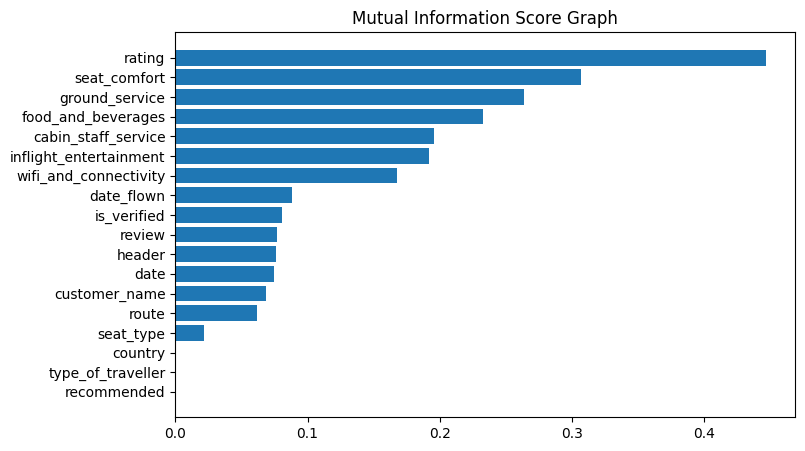

In [18]:
def plot_mi_score(score):
    score = score.sort_values(ascending=True)
    width = np.arange(len(score))
    ticks = list(score.index)
    plt.barh(width, score)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Score Graph")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_score(mi_score)